<a href="https://colab.research.google.com/github/boseull/tensorflow_example/blob/main/tensorflow_%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9%EA%B3%BC_%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

훈련 시 모델 성능 최고점 도달 후 감소   
-> 과대적합(훈련 세트에서는 높은 성능 / 테스트 세트에서는 낮은 성능)  
과소적합 : 테스트 세트의 성능이 향상될 여지가 있을 때  
          -단순한 모델, 규제가 많음, 짧은 훈련  
과대적합 - 과소적합 균형 필요 : 적절한 에포크 횟수동안 훈련  
과대적합 : 많은 데이터로 훈련, 규제(regularization) 사용  
규제 : 가중치 규제, 드롭아웃(dropout)



## import

In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


##IMDB 데이터셋 다운로드

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

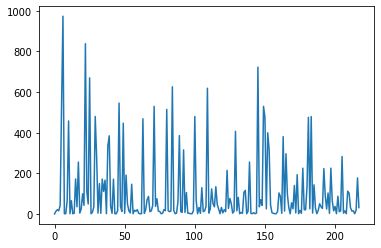

In [14]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  #0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듦
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results
plt.plot(train_data[0])
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

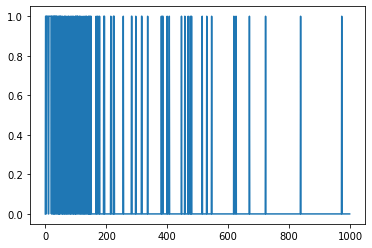

In [15]:
plt.plot(train_data[0])

##기준 모델 만들기

과대적합 막는 방법 : 모델 규모 축소, 학습 가능한 파라미터 수(기억 용량) 축소, 적절한 조절  
적은 수의 층, 파라미터로 시작 -> 검증 손실이 감소할 때 까지 새로운 층 추가


In [16]:
baseline_model = keras.Sequential([keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)), keras.layers.Dense(16, activation='relu'), keras.layers.Dense(1, activation='sigmoid')])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [17]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5918 - accuracy: 0.6906 - binary_crossentropy: 0.5918 - val_loss: 0.4406 - val_accuracy: 0.8162 - val_binary_crossentropy: 0.4406
Epoch 2/20
49/49 - 1s - loss: 0.3715 - accuracy: 0.8458 - binary_crossentropy: 0.3715 - val_loss: 0.3450 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.3450
Epoch 3/20
49/49 - 1s - loss: 0.3204 - accuracy: 0.8690 - binary_crossentropy: 0.3204 - val_loss: 0.3306 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3306
Epoch 4/20
49/49 - 1s - loss: 0.3079 - accuracy: 0.8738 - binary_crossentropy: 0.3079 - val_loss: 0.3293 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3293
Epoch 5/20
49/49 - 1s - loss: 0.3011 - accuracy: 0.8751 - binary_crossentropy: 0.3011 - val_loss: 0.3276 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3276
Epoch 6/20
49/49 - 1s - loss: 0.2992 - accuracy: 0.8766 - binary_crossentropy: 0.2992 - val_loss: 0.3318 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3318
Epoch 7/20
49/49 - 1s - loss

##작은 모델 만들기(기준 모델과 비교하기 위해)

In [18]:
smaller_model = keras.Sequential([keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)), keras.layers.Dense(4, activation='relu'), keras.layers.Dense(1, activation='sigmoid')])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [19]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6611 - accuracy: 0.6109 - binary_crossentropy: 0.6611 - val_loss: 0.5955 - val_accuracy: 0.7332 - val_binary_crossentropy: 0.5955
Epoch 2/20
49/49 - 0s - loss: 0.5056 - accuracy: 0.7963 - binary_crossentropy: 0.5056 - val_loss: 0.4442 - val_accuracy: 0.8239 - val_binary_crossentropy: 0.4442
Epoch 3/20
49/49 - 0s - loss: 0.3976 - accuracy: 0.8428 - binary_crossentropy: 0.3976 - val_loss: 0.3816 - val_accuracy: 0.8429 - val_binary_crossentropy: 0.3816
Epoch 4/20
49/49 - 0s - loss: 0.3524 - accuracy: 0.8581 - binary_crossentropy: 0.3524 - val_loss: 0.3535 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.3535
Epoch 5/20
49/49 - 0s - loss: 0.3295 - accuracy: 0.8661 - binary_crossentropy: 0.3295 - val_loss: 0.3459 - val_accuracy: 0.8551 - val_binary_crossentropy: 0.3459
Epoch 6/20
49/49 - 0s - loss: 0.3175 - accuracy: 0.8703 - binary_crossentropy: 0.3175 - val_loss: 0.3351 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3351
Epoch 7/20
49/49 - 0s - loss

## 큰 모델 만들기

In [20]:
bigger_model = keras.models.Sequential([keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)), keras.layers.Dense(512, activation='relu'), keras.layers.Dense(1, activation='sigmoid')])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4287 - accuracy: 0.7980 - binary_crossentropy: 0.4287 - val_loss: 0.3286 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3286
Epoch 2/20
49/49 - 3s - loss: 0.2883 - accuracy: 0.8808 - binary_crossentropy: 0.2883 - val_loss: 0.3277 - val_accuracy: 0.8573 - val_binary_crossentropy: 0.3277
Epoch 3/20
49/49 - 3s - loss: 0.2263 - accuracy: 0.9094 - binary_crossentropy: 0.2263 - val_loss: 0.3575 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3575
Epoch 4/20
49/49 - 3s - loss: 0.1180 - accuracy: 0.9618 - binary_crossentropy: 0.1180 - val_loss: 0.4136 - val_accuracy: 0.8460 - val_binary_crossentropy: 0.4136
Epoch 5/20
49/49 - 3s - loss: 0.0299 - accuracy: 0.9946 - binary_crossentropy: 0.0299 - val_loss: 0.5148 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.5148
Epoch 6/20
49/49 - 3s - loss: 0.0059 - accuracy: 0.9998 - binary_crossentropy: 0.0059 - val_loss: 0.6014 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.6014
Epoch 7/20
49/49 - 3s - loss

##훈련 손실과 검증 손실 그래프 그리기

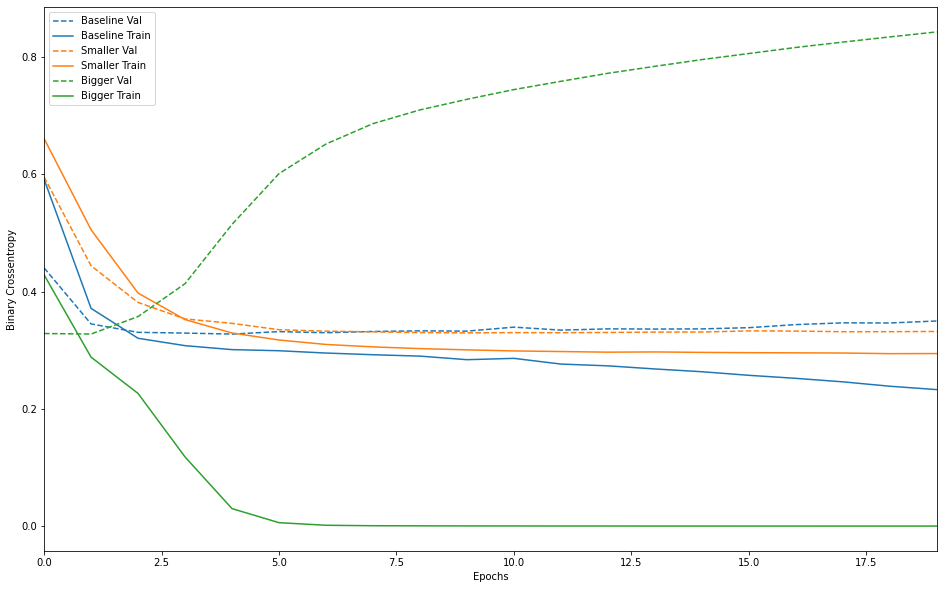

In [22]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')

    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline',baseline_history), ('smaller', smaller_history), ('bigger', bigger_history)])

bigger : 바로 과대적합 시작, 심각한 과대적합  
네트워크 용량이 많을수록 빠른 모델링, 쉬운 과대적합

간단한 모델이 비교적 덜 과대적합됨.  
간단한 모델 : 엔트로피가 작은 모델, 가중치가 작은 값을 갖는 모델  
->'가중치 규제' - 네트워크 복잡도 제약, 균일한 가중치 분포, 손실 함수에 큰 가중치에 해당하는 비용 추가  
-L1 규제 : 가중치의 절댓값에 비례하는 비용, 가중치 파라미터를 0으로 만듦
-L2 규제 : 가중치의 제곱에 비례하는 비용 (가중치 감쇠와 동일), 0으로 만들진 않음


In [25]:
from tensorflow.python.keras import regularizers
l2_model = keras.models.Sequential([keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)), keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'), keras.layers.Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6393 - accuracy: 0.6933 - binary_crossentropy: 0.5958 - val_loss: 0.4780 - val_accuracy: 0.8160 - val_binary_crossentropy: 0.4358
Epoch 2/20
49/49 - 0s - loss: 0.4079 - accuracy: 0.8470 - binary_crossentropy: 0.3651 - val_loss: 0.3828 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3402
Epoch 3/20
49/49 - 0s - loss: 0.3616 - accuracy: 0.8666 - binary_crossentropy: 0.3198 - val_loss: 0.3730 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3322
Epoch 4/20
49/49 - 0s - loss: 0.3501 - accuracy: 0.8712 - binary_crossentropy: 0.3102 - val_loss: 0.3664 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3276
Epoch 5/20
49/49 - 0s - loss: 0.3428 - accuracy: 0.8747 - binary_crossentropy: 0.3049 - val_loss: 0.3643 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3274
Epoch 6/20
49/49 - 0s - loss: 0.3400 - accuracy: 0.8750 - binary_crossentropy: 0.3040 - val_loss: 0.3630 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3278
Epoch 7/20
49/49 - 0s - loss

l2 : 전체 가중치 행렬 모든 값이 0.001 * weight_coefficient_value ** 2

In [ ]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

l2적용 -> 과대적합에 훨씬 잘 견딤

##드롭아웃 추가하기

드롭아웃 : 훈련하는 동안 층의 출력 특성을 랜덤하게 끔(0).  
[0.2 0.5 1.3 0.8 1.1] => [0 0.5 1.3 0 1.1]  
드롭아웃 비율 : 0이 되는 특성의 비율. 보통 0.2-0.5

In [27]:
dpt_model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)), keras.layers.Dropout(0.5), keras.layers.Dense(16, activation='relu'), keras.layers.Dropout(0.5), keras.layers.Dense(1, activation='sigmoid')])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6922 - accuracy: 0.5251 - binary_crossentropy: 0.6922 - val_loss: 0.6408 - val_accuracy: 0.7068 - val_binary_crossentropy: 0.6408
Epoch 2/20
49/49 - 1s - loss: 0.6120 - accuracy: 0.6603 - binary_crossentropy: 0.6120 - val_loss: 0.4921 - val_accuracy: 0.8167 - val_binary_crossentropy: 0.4921
Epoch 3/20
49/49 - 1s - loss: 0.5208 - accuracy: 0.7454 - binary_crossentropy: 0.5208 - val_loss: 0.4016 - val_accuracy: 0.8383 - val_binary_crossentropy: 0.4016
Epoch 4/20
49/49 - 0s - loss: 0.4621 - accuracy: 0.7907 - binary_crossentropy: 0.4621 - val_loss: 0.3597 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.3597
Epoch 5/20
49/49 - 0s - loss: 0.4205 - accuracy: 0.8191 - binary_crossentropy: 0.4205 - val_loss: 0.3432 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3432
Epoch 6/20
49/49 - 0s - loss: 0.4007 - accuracy: 0.8324 - binary_crossentropy: 0.4007 - val_loss: 0.3344 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3344
Epoch 7/20
49/49 - 0s - loss

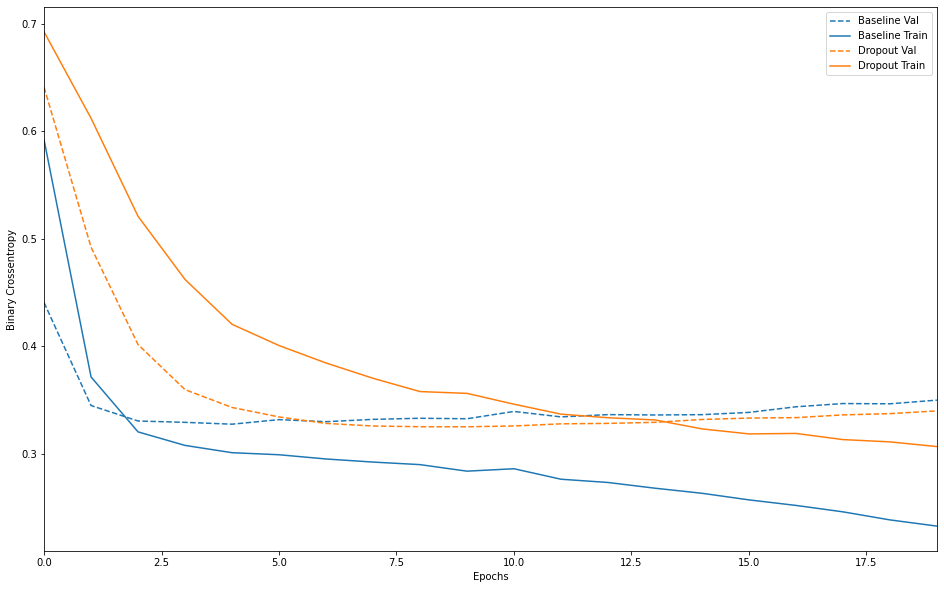

In [28]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])

과대적합 방지 : 많은 훈련 데이터, 네트워크 줄임, 가중치 규제, 드롭아웃 추가